# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '/Users/rollycostillas/Desktop/upenn/homework/myrepository/python-api-challenge/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lngs_list = list(lat_lngs)

# print number of cities in the final list
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"City {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")
        

City 1|ayame
City 2|vaini
City 3|mecca
City not found. skipping.
City 4|khatassy
City not found. skipping.
City 5|upernavik
City 6|bredasdorp
City 7|bluff
City 8|puerto ayora
City 9|nemuro
City 10|ancud
City 11|banes
City 12|esperance
City 13|pinawa
City 14|tonstad
City 15|punta arenas
City 16|hobart
City 17|ushuaia
City 18|duekoue
City 19|mataura
City 20|georgetown
City 21|preeceville
City 22|laguna
City 23|nikolskoye
City 24|butaritari
City 25|troitsko-pechorsk
City 26|carnarvon
City 27|kjollefjord
City 28|cape town
City 29|tuktoyaktuk
City 30|castro
City 31|bjornevatn
City 32|jamestown
City 33|pozo colorado
City 34|thompson
City 35|hohhot
City 36|isangel
City 37|poum
City 38|trairi
City 39|tasiilaq
City 40|barrow
City not found. skipping.
City not found. skipping.
City 41|berbera
City 42|rocha
City 43|oriximina
City 44|anadyr
City 45|rikitea
City 46|sakata
City not found. skipping.
City 47|sangar
City 48|busselton
City not found. skipping.
City 49|saint-philippe
City 50|kapaa
City n

City not found. skipping.
City 391|acarau
City 392|ouesso
City 393|dzhebariki-khaya
City not found. skipping.
City 394|great falls
City 395|balmazujvaros
City 396|alcudia
City 397|kodiak
City 398|leh
City 399|neiafu
City 400|zhangye
City 401|aykhal
City 402|lovozero
City 403|phek
City 404|kotido
City 405|ust-maya
City 406|barra patuca
City 407|pingdingshan
City 408|emilio carranza
City 409|gornopravdinsk
City 410|asau
City 411|canelones
City 412|vao
City 413|bonavista
City not found. skipping.
City 414|chicama
City 415|pisco
City 416|khaniotis
City 417|bongor
City 418|tianpeng
City 419|pelym
City 420|kochi
City 421|basco
City 422|chalakudi
City 423|sechenovo
City 424|port lincoln
City 425|griffith
City 426|bronnoysund
City 427|dehloran
City 428|klaksvik
City 429|benito juarez
City 430|salalah
City 431|vangaindrano
City 432|solano
City 433|garowe
City 434|vila velha
City 435|port-gentil
City 436|chillicothe
City 437|mugan
City not found. skipping.
City 438|alekseyevka
City 439|shaowu
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# create dataframe with data generated from API calls
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

# output dataframe to csv file
city_df.to_csv('/Users/rollycostillas/Desktop/upenn/homework/myrepository/python-api-challenge/cities.csv')

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Ayamé,91,CI,1651769549,66,5.6083,-3.1563,85.59,6.08
1,Vaini,5,TO,1651769549,72,-21.2000,-175.2000,76.39,5.48
2,Makkah al Mukarramah,0,SA,1651769550,35,21.4267,39.8261,88.11,7.65
3,Khatassy,95,RU,1651769550,88,61.9036,129.6383,33.78,10.58
4,Upernavik,18,GL,1651769551,73,72.7868,-56.1549,15.57,6.51
...,...,...,...,...,...,...,...,...,...
559,Aripuanã,95,BR,1651769790,55,-9.1667,-60.6333,87.62,3.15
560,Portland,100,US,1651769703,91,45.5234,-122.6762,49.35,4.00
561,Bodden Town,20,KY,1651769790,66,19.2833,-81.2500,86.00,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# inspect the basic statistical values of the dataframe, paying attention to make sure no max humidity over 100
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000
mean,58.047872,1.651770e+09,69.492908,22.118171,20.694976,62.032713,8.109787
std,38.414023,8.675578e+01,21.565917,33.346455,90.379642,20.781807,5.352356
min,0.000000,1.651769e+09,1.000000,-54.800000,-179.166700,2.880000,0.000000
25%,20.000000,1.651770e+09,57.000000,-3.836550,-56.605825,48.865000,4.380000
50%,69.500000,1.651770e+09,73.000000,27.944300,24.699050,66.355000,6.890000
75%,99.000000,1.651770e+09,86.250000,50.112300,102.324125,78.285000,10.702500
max,100.000000,1.651770e+09,100.000000,78.218600,179.316700,107.820000,31.990000


In [36]:
# get the indices of cities that have humidity over 100%
bad_data = []

# if any cities have humidity over 100%, print the index values of those lines
if city_df["Humidity"].max() > 100:
    bad_data = city_df.loc[city_df["Humidity"]>100, :].index.values
    print(bad_data)

In [7]:
# create new dataframe while dropping humidity outliers by index value
clean_city_df = city_df.drop(bad_data, inplace=False)
clean_city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000
mean,55.527675,1.651760e+09,67.426199,19.745942,20.134690,64.189004,8.260867
std,39.932038,2.353032e+02,23.310749,33.545531,90.767519,20.583543,5.499765
min,0.000000,1.651759e+09,6.000000,-54.800000,-175.200000,5.590000,0.000000
25%,14.000000,1.651760e+09,53.000000,-6.817175,-59.321725,51.465000,4.070000
50%,58.500000,1.651760e+09,74.000000,24.009300,20.253900,67.925000,6.910000
75%,99.750000,1.651760e+09,85.000000,47.686850,105.102450,79.052500,11.232500
max,100.000000,1.651760e+09,100.000000,78.218600,178.416700,106.770000,28.790000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

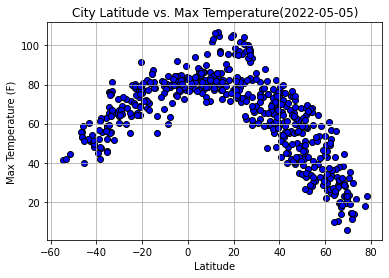

In [39]:
#Converting Date for title of plot
timestamp = clean_city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig01-Lat_vs_Temp")
plt.show()

The above illustration demonstrates that there is a relationship between Latitude and Max Temp. Places closer to the equator (Latitude=0) experience extreme temperature at its peak, then as it move towards the pole temperature decreases gradually.

## Latitude vs. Humidity Plot

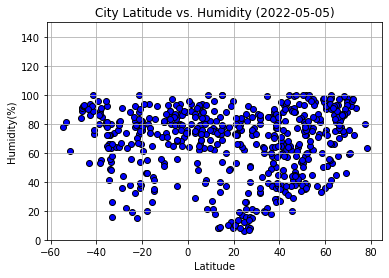

In [40]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, clean_city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig02-Lat_vs_Humidity")
plt.show()

The above illustration does not appear to have a relationship between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

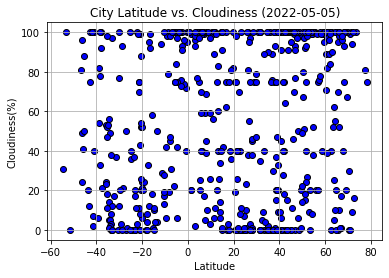

In [41]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig03-Lat_vs_Cloudiness")
plt.show()

The above illustration does not appear to have a relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

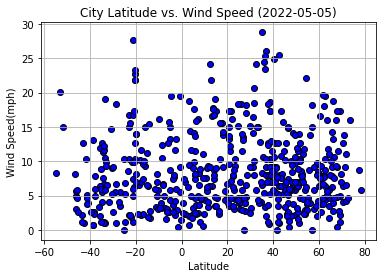

In [42]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig04-Lat_vs_Windspeed")
plt.show()

The above illustration does not appear to have a relationship between Latitude and Wind Speed.

## Linear Regression

In [43]:
# create new DataFrames that only contain northern and southern hemisphere data, respectively
Northern_Hemisphere = clean_city_df.loc[clean_city_df["Lat"]>=0]
Southern_Hemisphere = clean_city_df.loc[clean_city_df["Lat"]<0]

In [44]:
# function to generate hemisphere scatter plots with linear regressions
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8524719382979493


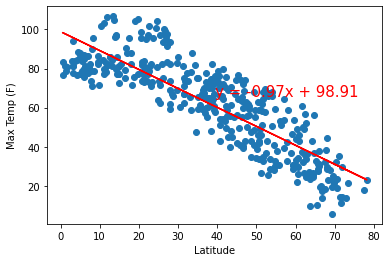

In [45]:
# call function to print Lat vs Temp scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.savefig("..//WeatherPy/output_data/Fig05-NorthHem_CityLat_vs_MaxTemp")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8012535571916255


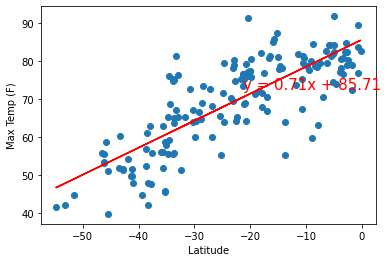

In [46]:
# call function to print Lat vs Temp scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.savefig("..//WeatherPy/output_data/Fig06-SouthHem_CityLat_vs_MaxTemp")
linear_reg_plot(x_values,y_values)
plt.show()

Max Temp vs. Latitude Analysis

In the Northern Hemisphere, the r-value demonstrates a moderate, negative relationship between latitude and max temperature. This means that as you approach the equator (Latitude = 0), the temperature tends to be higher. In the Southern Hemisphere, the r-value demonstrates a strong, positive relationship between latitude and max temperature. This means that as you approach the equator, the temperature tends to be higher. Both graphs are simulating a similar relationship: the highest temps tend to occur nearest the equator, while the lowest temps tend to occur furthest away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19061807007258844


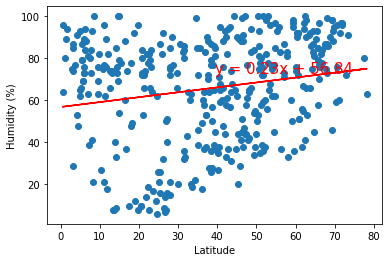

In [47]:
# call function to print Lat vs Humidity scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.savefig("..//WeatherPy/output_data/Fig07-NorthHem_CityLat_vs_Humidity")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.028288407954761136


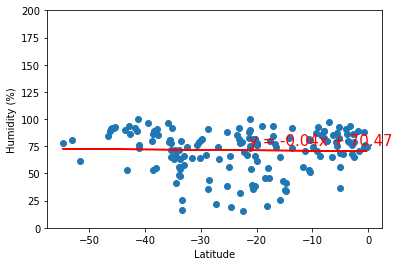

In [48]:
# call function to print Lat vs Humidity scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.savefig("..//WeatherPy/output_data/Fig08-SouthHem_CityLat_vs_Humidity")
linear_reg_plot(x_values,y_values)
plt.show()

Humidity vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and humidity. This means that there is no evidence here to support a relationship between proximity to the equator and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12803205816773033


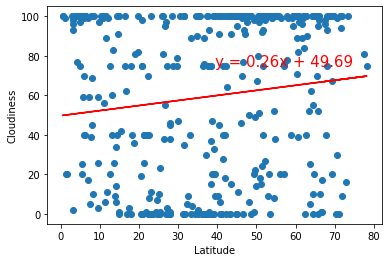

In [49]:
# call function to print Lat vs Cloudiness scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.savefig("..//WeatherPy/output_data/Fig09-NorthHem_CityLat_vs_Cloudiness")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22400937799856316


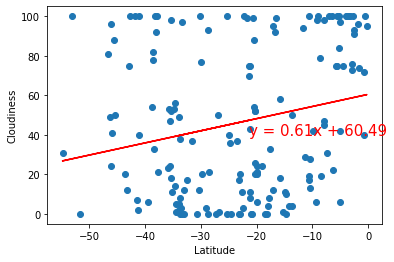

In [50]:
# call function to print Lat vs Cloudiness scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.savefig("..//WeatherPy/output_data/Fig10-SouthHem_CityLat_vs_Cloudiness")
linear_reg_plot(x_values,y_values)
plt.show()

Cloudiness vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and cloudiness. This means that there is no evidence here to support a relationship between proximity to the equator and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.026193019037463388


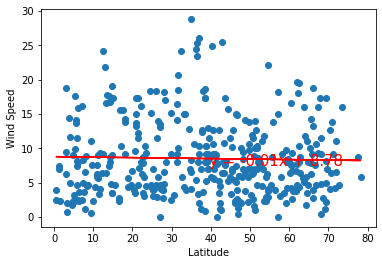

In [51]:
# call function to print Lat vs Wind Speed scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.savefig("..//WeatherPy/output_data/Fig11-NorthHem_CityLat_vs_WindSpeed")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.065849611672944


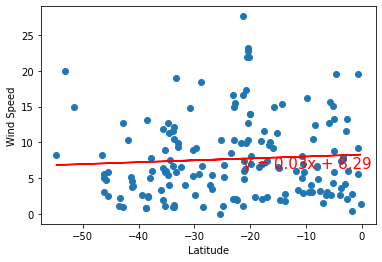

In [52]:
# call function to print Lat vs Wind Speed scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.savefig("..//WeatherPy/output_data/Fig12-SouthHem_CityLat_vs_WindSpeed")
linear_reg_plot(x_values,y_values)
plt.show()

Wind Speed vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak/non-existent relationship between latitude and wind speed. This means that there is no evidence here to support a relationship between proximity to the equator and wind speed.